In [ ]:
!pip3 install matplotlib

In [2]:
from matplotlib import pyplot as plt
import random
import numpy as np

In [99]:
WIDTH = 10
HEIGHT = 10
WIN_STATE = [5,5]
LOSS_STATES = [[4,4], [4,6], [5,6], [5,4],[6,4], [6,6]]


In [100]:
def generate_env_q_matrix(height, width, loss_states, win_state):
    env = [[0 for x in range(width)] for y in range(height)]
    for loss_state in loss_states:
        env[loss_state[0]][loss_state[1]] = -100
    env[win_state[0]][win_state[1]] = 100


    q_matrix = [[[0,0,0,0] for x in range(width)] for y in range(height)]
    return env, q_matrix



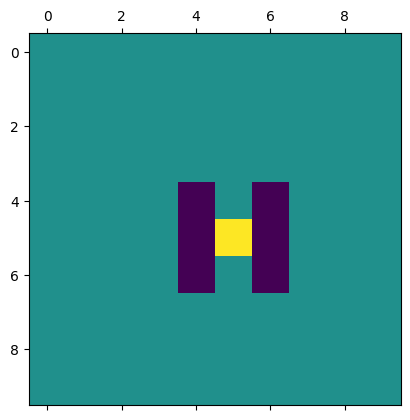

In [101]:
env, q_matrix = generate_env_q_matrix (HEIGHT ,WIDTH, LOSS_STATES, WIN_STATE)
plt.matshow(env)


In [74]:


def get_possible_actions(current_pos):
    # N(0), S(1), E(2), W(3) 
    actions =[]
    if current_pos[0] > 0:
        actions.append(0)
    if current_pos[0] < len(env)-1:
        actions.append(1)
    if current_pos[1] < len(env[0])-1:
        actions.append(2)
    if current_pos[1] > 0:
        actions.append(3)
    return actions

def game_complete(current_pos):
    return current_pos == WIN_STATE or current_pos in LOSS_STATES

def goal_reached(current_pos):
    return current_pos == WIN_STATE

def get_next_state(current_pos, action):
    if(action == 0):
        return [current_pos[0] - 1,current_pos[1]] 
    elif (action == 1):
        return [current_pos[0] + 1,current_pos[1]] 
    elif (action == 2):
        return [current_pos[0],current_pos[1]+1]
    else:
        return [current_pos[0],current_pos[1]-1] 


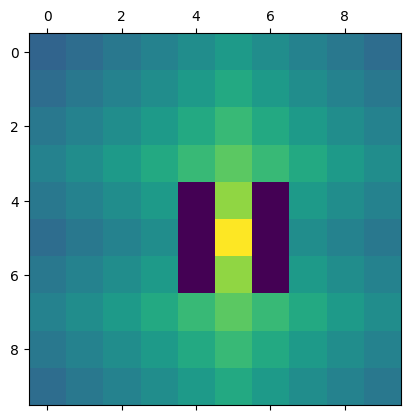

In [113]:
discount = 0.9
learning_rate = 0.1

for _ in range(10000):
    current_pos = [random.randint(0, len(env)-1), random.randint(0, len(env)-1)]
    while(not game_complete(current_pos)):
        possible_actions = get_possible_actions(current_pos)
        action = random.choice(possible_actions)
        next_state = get_next_state(current_pos, action)
        q_matrix[current_pos[0]][current_pos[1]][action] = q_matrix[current_pos[0]][current_pos[1]][action] + learning_rate * (env[next_state[0]][next_state[1]] + discount *  max(q_matrix[next_state[0]][next_state[1]]) - q_matrix[current_pos[0]][current_pos[1]][action])
        current_pos = next_state
      



values = []
directions = []

for row in q_matrix:
    for column in row:
        values.append(column[np.argmax(column)])
        directions.append(np.argmax(column))


values = np.reshape(values,(HEIGHT,WIDTH))
directions = np.reshape(directions,(HEIGHT,WIDTH))

values[WIN_STATE[0]][WIN_STATE[1]] =  120



plt.matshow(values)


